## Problem Metadata 
DO NOT DELETE. This is a JSON Block. The metadata and course context MUST be in the first cell. 

```json
{
    "problem_title": "rankineCycleSupercriticalPyCalor",
    "author": "tschutzius",
    "year": "Fa25",
    "difficulty_tags": ["easy"],
    "topic": "Power Cycles",
    "lecture_reference": {
        "lecture_id": "1_6nyr06f2",
        "subtopics": [
            {
              "key": "Fa25-L10a-3.0",
              "title": "Supercritical Rankine cycle: Water"
            }
        ]
    },
    "book_reference": {
        "chapter_number": 10,
        "title": "Vapor and Combined Power Cycles",
        "sections": [
            "How Can we Increase the Efficiency of the Rankine Cycle?"
        ]
    },
    "notes": ""
}

## 1. Problem Statement

Consider a modern fossil fuel steam power plant operating on the ideal supercritical Rankine cycle. Here are the states:

- (1) after the condenser, entering the pump;
- (2) after the pump, entering the boiler;
- (3) after the boiler, entering the turbine;
- (4) after the turbine, entering the condenser.

Steam enters the turbine at $p_3$ and $T_3$ and is condensed in the condeser at a pressure of $p_4$. 

**Goal:** Determine the thermal efficiency of this cycle.

## 2. Schematic 

Draw a schematic that shows a pump, heat exchanger (boiler), turbine, and heat exchanger (condenser) all connected in series. There is a single inlet and outlet to each device. Draw control volumes around each device and also around the entire system. Work is transferred into the pump and out of the turbine. Heat is transferred into the hot heat exchanger (boiler) and out of the cold heat exchanger (condenser). 

## 3. Assumptions and Approximations
### A. General (Cycle-Wide) Assumptions
1.  **Steady-State/Steady-Flow:** For each device in the cycle ($\Delta m_\text{CV}= 0$, $\Delta E_\text{CV}= 0$, $\Delta S_\text{CV}= 0$).
2.  **Overall Energy:** All changes in **Kinetic Energy ($\Delta KE$) and Potential Energy ($\Delta PE$)** are negligible between components, except where explicitly calculated (e.g., for a nozzle or diffuser).
3.  ***Property Model and Analysis Method:*** 
    * **Property tables: `pyCalor` (Accurate):**
        * **Purpose:** Must be used for determining water properties. 
        * **Tools:** Properties ($h$, $s$, $T$, and $p$) are retrieved directly from a **thermodynamic property library** (e.g., **`pyCalor`**). Since it is a pure substance we only need to know two independent properties.

---

### B. Component-Specific Assumptions

1.  **Conservation of Mass:** For all devices operating at steady-flow, the mass entering is equal to the mass exiting: **$\dot{m}_{\text{in}} = \dot{m}_{\text{out}}$**).
2.  **Conservation of Energy (First Law):** The **Steady-Flow Energy Equation** is applied to determine work and heat transfer.
3.  **Entropy Balance (Second Law):** The **Entropy Balance for a Control Volume Equation** is applied to determine changes in entropy.

#### 1-2. Compressor
* **Adiabatic:** $\dot{Q}=0$.
* **Ideal Process:** The ideal process is **Isentropic** ($s_{\text{in}} = s_{\text{out}}$).
* **Actual Process:** The actual work is determined by a specified **Isentropic Efficiency ($\eta_C$)**.

#### 2-3. Boiler
* **Isobaric:** $\Delta p=0$ (constant pressure heat addition).
* **No Shaft Work:** $\dot{W}=0$.

#### 3-4. Turbine
* **Adiabatic:** $\dot{Q}=0$.
* **Ideal Process:** The ideal process is **Isentropic** ($s_{\text{in}} = s_{\text{out}}$).
* **Actual Process:** The actual work is determined by a specified **Isentropic Efficiency ($\eta_T$)**.

#### 4-1. Condenser
* Idealized as a **Heat Exchanger** rejecting heat out of the cycle
* **Isobaric:** $\Delta p=0$ (constant pressure heat addition).
* **No Shaft Work:** $\dot{W}=0$.

## 4. Physical Laws
### Control Volumes:
1.  **First Law of Thermodynamics (Energy Balance for Control Volume):**
    $$\frac{dE_\text{CV}}{dt} = \dot{E}_\text{in} - \dot{E}_\text{out}$$

2.  **Conservation of Mass (Mass Balance for a Control Volume):**
    $$\frac{dm_\text{CV}}{dt} = \dot{m}_\text{in} - \dot{m}_\text{out}$$
    
3.  **Entropy Balance (Second Law for a Control Volume):**
    $$\frac{dS_\text{CV}}{dt} = \dot{S}_\text{in} - \dot{S}_\text{out} + \dot{S}_\text{gen}$$

### Steady-Flow Analysis
Since each devices operates as a **Steady-Flow** device we can write: 

**Mass Balance:**
$$\dot{m}_\text{in} = \dot{m}_\text{out} = \dot{m}$$

**Energy Balance:**
$$\dot{W}_\text{in} + \dot{Q}_\text{in} + \dot{m} \left(h_\text{in} + \frac{w_\text{in}^2}{2} + g z_\text{in} \right) = \dot{W}_\text{out} + \dot{Q}_\text{out} + \dot{m} \left(h_\text{out} + \frac{w_\text{out}^2}{2} + g z_\text{out} \right)$$

Neglecting kinetic and potential energy effects:
$$\dot{W}_\text{in} + \dot{Q}_\text{in} + \dot{m} \left(h_\text{in} \right) = \dot{W}_\text{out} + \dot{Q}_\text{out} + \dot{m} \left(h_\text{out} \right)$$

**Entropy Balance:**
$$\dot{S}_\text{gen} = \dot{S}_\text{out} - \dot{S}_\text{in}$$

Assuming that the process is adiabatic and reversible (isentropic), we have:
$$\dot{S}_\text{out} = \dot{S}_\text{in}$$

and

$$\dot{m}_\text{out}s_\text{out} = \dot{m}_\text{in}s_\text{in}$$

Therefore,

$$s_\text{in} = s_\text{out}$$

### Device Governing Equations (First Law)
We can write our steady-flow energy equation for each device by applying the appropriate **Assumptions and Approximations** listed above.

For the pump (1-2):
$$\dot{W}_\text{in} =  \dot{m} \left(h_\text{2a} - h_1\right)$$

For the boiler (2-3):
$$\dot{Q}_\text{in} = \dot{m} \left(h_3 - h_\text{2a} \right)$$

For the turbine (3-4):
$$\dot{W}_\text{out} = \dot{m} \left(h_3 - h_\text{4a} \right)$$

For the condenser (4-1):
$$\dot{Q}_\text{out} = \dot{m} \left(h_\text{4a} - h_1 \right)$$

### Isentropic Efficiency (Linking Actual and Ideal States)

The efficiency definitions are used to determine the actual exit enthalpies ($h_{2a}$ and $h_{4a}$):

**Pump Isentropic Efficiency:**
$$\eta_\text{pump} = \frac{\text{Isentropic pump work}}{\text{Actual pump work}} = \frac{h_{2s} - h_1}{h_{2a} - h_1} $$

**Turbine Isentropic Efficiency:**
$$\eta_\text{turbine} = \frac{\text{Actual turbine work}}{\text{Isentropic turbine work}} = \frac{h_{3} - h_{4a}}{h_{3} - h_{4s}} $$

In [2]:
# 5. Properties (Code Cell)
!pip install pyCalor
from pyCalor import thermo as th
substance = 'water'

# state 3
T3_C = 565
p3_MPa = 24
T3_K = T3_C + 273.15
st3 = th.state(substance,p=(p3_MPa,'Mpa'),T=(T3_C,'C'),name='3')
s3_kJperKgPerK = st3.s

# state 4
p4_kPa = 75
p4_MPa = p4_kPa/1000
s4_kJperKgPerK = s3_kJperKgPerK #isentropic
st4s = th.state(substance,s=(s4_kJperKgPerK,'kJ/kg K'),p=(p4_MPa,'Mpa'),name='4s')

# state 1: Assumed to be a saturated liquid since it is at the exit of the condenser
p1_MPa = p4_MPa
x1 = 0 # saturated liquid
st1 = th.state(substance,p=(p1_MPa,'Mpa'),x=x1,name='1')
s1_kJperKgPerK = st1.s

# state 2
p2_MPa = p3_MPa
s2_kJperKgPerK = s1_kJperKgPerK #isentropic
st2s = th.state(substance,s=(s2_kJperKgPerK,'kJ/kg K'),p=(p2_MPa,'Mpa'),name='2s')

The isentropic compressor work is: 24.6909 kJ/kg
The boiler heat duty is: 2988.62 kJ/kg
The turbine work is: 1168.73 kJ/kg
The condenser heat duty is 1844.58 kJ/kg
The overall efficiency is 38.28%.


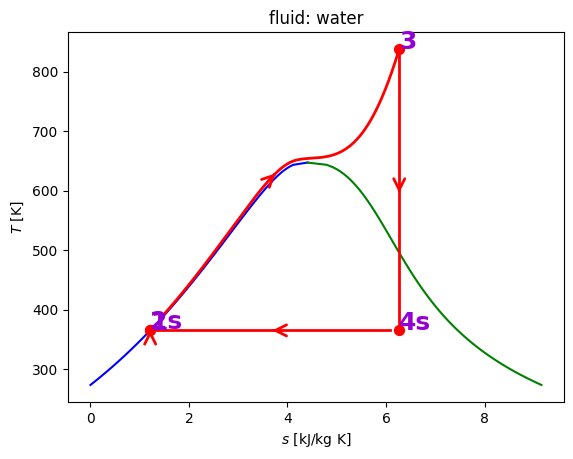

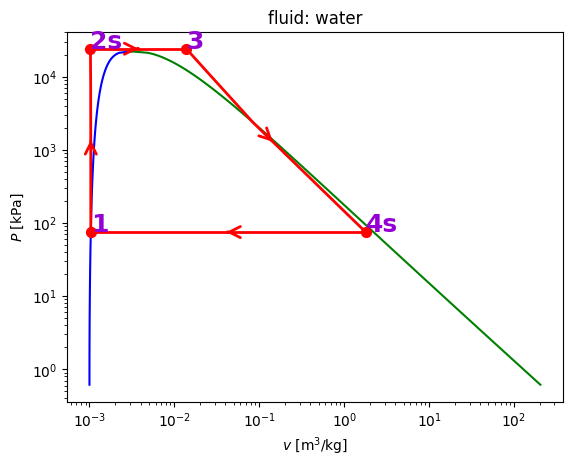

The Carnot efficiency of this power plant is 56.46%.


In [3]:
# 6 Calculations (Code Cell)
# work in, kJ/kg
wIn_kJperKg = st2s.h - st1.h
# heat in, kJ/kg
qIn_kJperKg = st3.h - st2s.h 
# work out, kJ/kg
wOut_kJperKg = st3.h - st4s.h
# heat out, kJ/kg
qOut_kJperKg = st4s.h - st1.h 
# thermal efficiency
eta = (qIn_kJperKg - qOut_kJperKg)/qIn_kJperKg

print('The isentropic compressor work is: {0:1.4f} kJ/kg'.format(wIn_kJperKg))
print('The boiler heat duty is: {0:1.2f} kJ/kg'.format(qIn_kJperKg))
print('The turbine work is: {0:1.2f} kJ/kg'.format(wOut_kJperKg))
print('The condenser heat duty is {0:1.2f} kJ/kg'.format(qOut_kJperKg))
print('The overall efficiency is {0:1.2%}.'.format(eta))

# plotting Ts and pv diagrams
pr = th.process([(st1,st2s),(st2s,st3),(st3,st4s),(st4s,st1)])
fig1 = pr.plot('Ts');
fig2 = pr.plot('pv');

fig1.savefig("figure_1.pdf")
fig2.savefig("figure_2.pdf")

#It is instructive to compare the efficiency we calculated here with the Carnot efficiency. Recall that:
#$\eta_\text{Carnot} = 1 - \frac{T_\text{C}}{T_\text{H}}$.
TC_K = st4s.T
TH_K = st3.T

eta_carnot = 1 - TC_K / TH_K
print('The Carnot efficiency of this power plant is {0:1.2%}.'.format(eta_carnot))

## 7. Summary and Reasoning
...

THIS SHOULD BE THE FINAL CELL, DO NOT ADD OTHERS AFTER THIS, EVEN IF THEY'RE EMPTY
--- End of the Jupyter Notebook ---